In [1]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('data.csv')

In [3]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
train[train['label']==1].shape

(2242, 3)

In [5]:
train[train['label']==0].shape

(29720, 3)

In [6]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [7]:
import re

In [8]:
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',tweet)
remove_URL(example)

'New competition launched :'

In [9]:
import string

In [10]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [11]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [12]:
train.drop(columns=['id'],inplace=True)

In [13]:

train=train.dropna()

In [14]:
train

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [15]:
df_x=train['tweet']
df_y=train['label']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3, random_state=9)
print(x_train.shape)
print(x_test.shape)

(22373,)
(9589,)


In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer(min_df=1,stop_words='english')

In [19]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
X_test_counts=tfidf_vectorizer.transform(x_test)

In [20]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(tfidf_train, y_train)

SVC(kernel='linear', random_state=0)

In [21]:
classifier.score(tfidf_train,y_train)

0.9813614624770929

In [22]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test_counts )
accuracy_score(y_pred,y_test)

0.9619355511523621

In [23]:
import sklearn.metrics

In [24]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8908
           1       0.90      0.52      0.66       681

    accuracy                           0.96      9589
   macro avg       0.93      0.76      0.82      9589
weighted avg       0.96      0.96      0.96      9589



In [25]:
y_pred = classifier.predict(X_test_counts )
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[8870,   38],
       [ 327,  354]], dtype=int64)

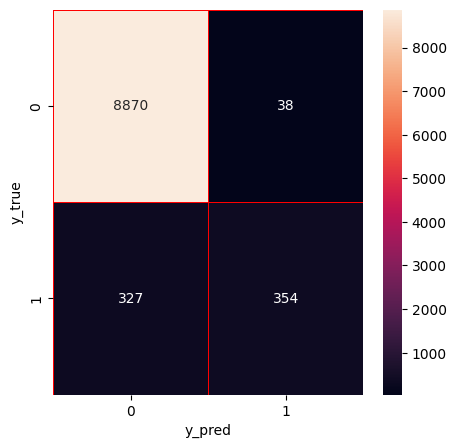

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [27]:
with open('tfid.pickle','wb') as f:
    pickle.dump(tfidf_vectorizer,f)

In [28]:
with open('hate.pickle','wb') as f:
    pickle.dump(classifier,f)